In [126]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import squarify as sq
from matplotlib.ticker import PercentFormatter

from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr

#Use fivethirtyeight style
plt.style.use('fivethirtyeight')

#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [127]:
df = pd.read_csv(r"C:/Users/dimit/OneDrive/Desktop/git_projects/git-projects/Pakistan Largest Ecommerce Dataset.csv.zip")

# Pre-process and Data cleaning

In [128]:
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.000000,complete,7/1/2016,kreations_YI 06-L,1950.000000,1.000000,1950.000000,100147443,Women's Fashion,\N,...,7.000000,2016-7,7-2016,FY17,1.000000,NaN,NaN,NaN,NaN,NaN
1,211133.000000,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.000000,1.000000,240.000000,100147444,Beauty & Grooming,\N,...,7.000000,2016-7,7-2016,FY17,2.000000,NaN,NaN,NaN,NaN,NaN
2,211134.000000,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.000000,1.000000,2450.000000,100147445,Women's Fashion,\N,...,7.000000,2016-7,7-2016,FY17,3.000000,NaN,NaN,NaN,NaN,NaN
3,211135.000000,complete,7/1/2016,kcc_krone deal,360.000000,1.000000,60.000000,100147446,Beauty & Grooming,R-FSD-52352,...,7.000000,2016-7,7-2016,FY17,4.000000,NaN,NaN,NaN,NaN,NaN
4,211136.000000,order_refunded,7/1/2016,BK7010400AG,555.000000,2.000000,1110.000000,100147447,Soghaat,\N,...,7.000000,2016-7,7-2016,FY17,5.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df=df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1)

In [130]:
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.000000,complete,7/1/2016,kreations_YI 06-L,1950.000000,1.000000,1950.000000,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.000000
1,211133.000000,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.000000,1.000000,240.000000,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.000000,7.000000,2016-7,7-2016,FY17,2.000000
2,211134.000000,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.000000,1.000000,2450.000000,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.000000,7.000000,2016-7,7-2016,FY17,3.000000
3,211135.000000,complete,7/1/2016,kcc_krone deal,360.000000,1.000000,60.000000,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.000000
4,211136.000000,order_refunded,7/1/2016,BK7010400AG,555.000000,2.000000,1110.000000,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.000000,7.000000,2016-7,7-2016,FY17,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [132]:
df.isnull().sum()

item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    601229
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
dtype: int64

In [133]:
df['status'].unique()

array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', nan, 'processing', 'payment_review'],
      dtype=object)

In [134]:
df=df.dropna(subset=['item_id'])

In [135]:
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.000000,complete,7/1/2016,kreations_YI 06-L,1950.000000,1.000000,1950.000000,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.000000
1,211133.000000,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.000000,1.000000,240.000000,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.000000,7.000000,2016-7,7-2016,FY17,2.000000
2,211134.000000,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.000000,1.000000,2450.000000,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.000000,7.000000,2016-7,7-2016,FY17,3.000000
3,211135.000000,complete,7/1/2016,kcc_krone deal,360.000000,1.000000,60.000000,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.000000
4,211136.000000,order_refunded,7/1/2016,BK7010400AG,555.000000,2.000000,1110.000000,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.000000,7.000000,2016-7,7-2016,FY17,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.000000,cod,8/28/2018,WOFSCE5AE00357AECDE,699.000000,1.000000,849.000000,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018.000000,8.000000,2018-8,8-2018,FY19,115320.000000
584520,905205.000000,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.000000,1.000000,35899.000000,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.000000,8.000000,2018-8,8-2018,FY19,115326.000000
584521,905206.000000,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.000000,2.000000,652178.000000,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.000000,8.000000,2018-7,8-2018,FY19,113474.000000
584522,905207.000000,processing,8/28/2018,MATSAM5B1509B4696EA,87300.000000,2.000000,652178.000000,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.000000,8.000000,2018-7,8-2018,FY19,113474.000000


In [136]:
df['status']=df['status'].replace(to_replace=['order_refunded', 'refund'], value='refunded')
df['status']=df['status'].replace(to_replace=['received', 'paid'], value='complete')
df['status']=df['status'].replace(to_replace=['pending_paypal', 'holded', 'processing'], value='pending')



In [137]:
df['price']=df['price']*0.004
df['grand_total']=df['grand_total']*0.004

In [138]:
df

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.000000,complete,7/1/2016,kreations_YI 06-L,7.800000,1.000000,7.800000,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.000000
1,211133.000000,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,0.960000,1.000000,0.960000,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.000000,7.000000,2016-7,7-2016,FY17,2.000000
2,211134.000000,canceled,7/1/2016,Ego_UP0017-999-MR0,9.800000,1.000000,9.800000,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.000000,7.000000,2016-7,7-2016,FY17,3.000000
3,211135.000000,complete,7/1/2016,kcc_krone deal,1.440000,1.000000,0.240000,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.000000
4,211136.000000,refunded,7/1/2016,BK7010400AG,2.220000,2.000000,4.440000,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.000000,7.000000,2016-7,7-2016,FY17,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.000000,cod,8/28/2018,WOFSCE5AE00357AECDE,2.796000,1.000000,3.396000,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018.000000,8.000000,2018-8,8-2018,FY19,115320.000000
584520,905205.000000,pending,8/28/2018,MATHUA5AF70A7D1E50A,142.396000,1.000000,143.596000,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.000000,8.000000,2018-8,8-2018,FY19,115326.000000
584521,905206.000000,pending,8/28/2018,MATSAM5B6D7208C6D30,519.996000,2.000000,2608.712000,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.000000,8.000000,2018-7,8-2018,FY19,113474.000000
584522,905207.000000,pending,8/28/2018,MATSAM5B1509B4696EA,349.200000,2.000000,2608.712000,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.000000,8.000000,2018-7,8-2018,FY19,113474.000000


In [139]:
df['status'].unique()

array(['complete', 'canceled', 'refunded', 'closed', 'fraud', 'pending',
       'exchange', '\\N', 'cod', nan, 'payment_review'], dtype=object)

In [140]:
df['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-null  o

In [142]:
df.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137178
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

In [143]:
df['item_id']=df['item_id'].astype(str)

In [144]:
type(df['item_id'][0])

str

In [145]:
df['created_at']=pd.to_datetime(df['created_at'])

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  object        
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        584360 non-null  object        
 9   sales_commission_code  447346 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  object   

In [147]:
# df['order_date']=df['created_at'].rename('order_date')
df=df.rename(columns={"created_at": "order_date"})

# Top 5 selling category

In [148]:
best_selling_category=df[df['status']=='complete'].groupby(['category_name_1']).agg({'grand_total': 'sum','Customer ID': 'nunique'}).round(2).sort_values('grand_total', ascending=False).reset_index()#.plot.bar()
best_selling_category.head(10)

,category_name_1,grand_total,Customer ID
0,Mobiles & Tablets,2447126.730000,22066
1,Appliances,936359.650000,12043
2,Entertainment,769426.170000,5464
3,Women's Fashion,567322.080000,12708
4,Men's Fashion,346913.880000,22061
5,Superstore,241162.410000,5088
6,Others,234808.420000,6056
7,Beauty & Grooming,195374.790000,9799
8,Computing,194288.260000,4687
9,Home & Living,161878.170000,7415


In [149]:
pd.set_option('float_format', '{:f}'.format)

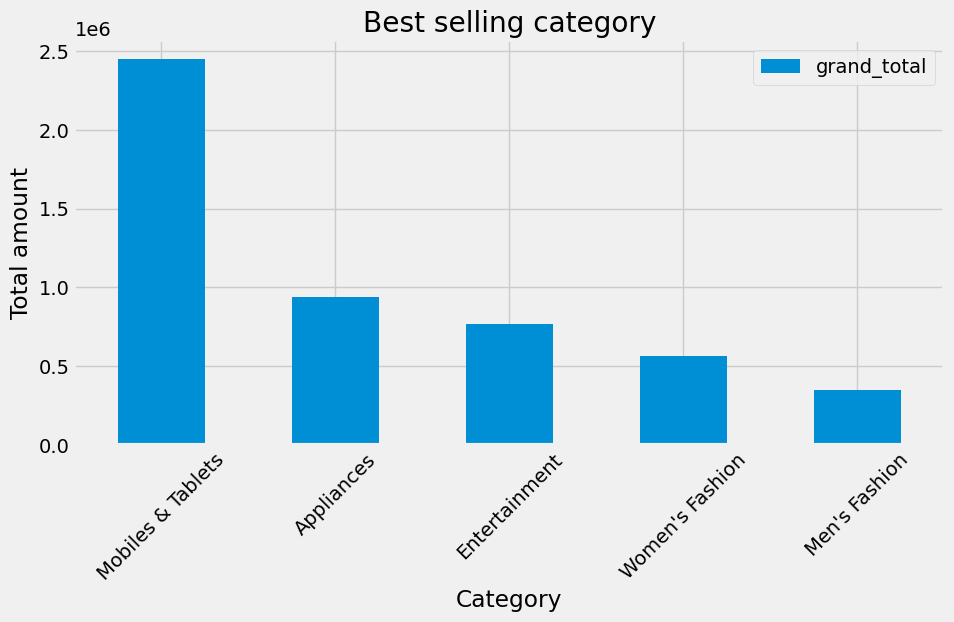

In [150]:
best_selling_category.head(5).plot.bar(x='category_name_1', y='grand_total')
plt.title('Best selling category')
plt.xlabel('Category')
plt.ylabel('Total amount')
plt.xticks(rotation=45)
plt.show()

# Average basket per category

In [151]:
best_selling_category['average_basket']=best_selling_category['grand_total']/best_selling_category['Customer ID']
average_basket_per_category=best_selling_category.sort_values('average_basket', ascending=False)
average_basket_per_category

,category_name_1,grand_total,Customer ID,average_basket
2,Entertainment,769426.170000,5464,140.817381
0,Mobiles & Tablets,2447126.730000,22066,110.900332
1,Appliances,936359.650000,12043,77.751362
5,Superstore,241162.410000,5088,47.398272
3,Women's Fashion,567322.080000,12708,44.642908
8,Computing,194288.260000,4687,41.452584
6,Others,234808.420000,6056,38.772857
13,\N,74776.430000,2063,36.246452
9,Home & Living,161878.170000,7415,21.831176
7,Beauty & Grooming,195374.790000,9799,19.938238


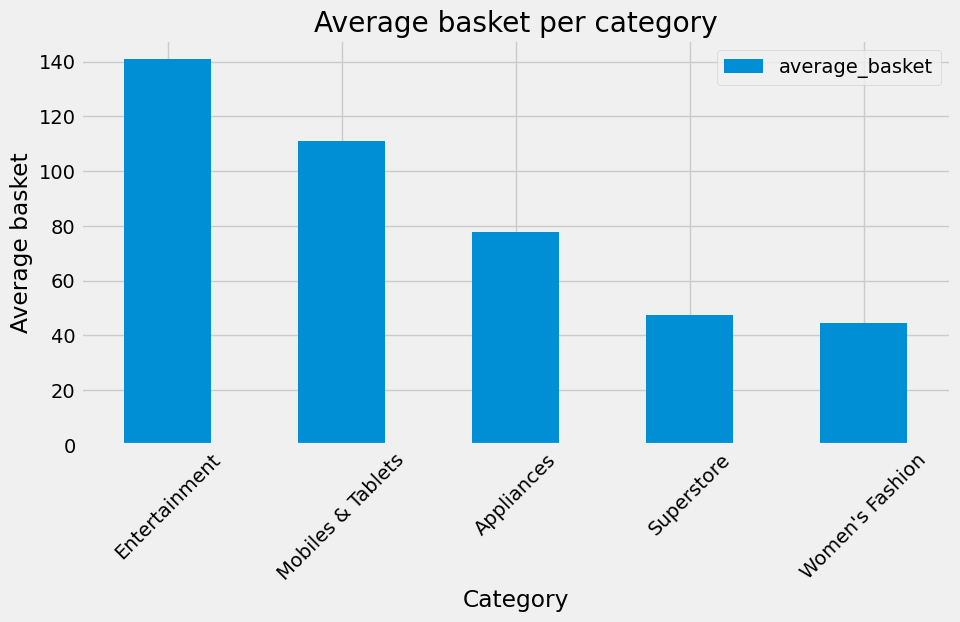

In [152]:
average_basket_per_category.head(5).plot.bar(x='category_name_1', y='average_basket')
plt.title('Average basket per category')
plt.xlabel('Category')
plt.ylabel('Average basket')
plt.xticks(rotation=45)
plt.show()


# Category entertainment is opportunity to expand, try to attract more people to this category
# Men's Fashion is crowded but with low average basket

Insights
# Category entertainment is opportunity to expand, try to attract more people to this category
# Men's Fashion is crowded but with low average basket

In [153]:
df.describe()

,order_date,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584524,584524.000000,584524.000000,584524.000000,584524.000000,584524.000000,584524.000000,584513.000000
mean,2017-08-08 11:42:53.589450752,25.394990,1.296388,34.122474,499.492775,2017.044115,7.167654,45790.511965
min,2016-07-01 00:00:00,0.000000,1.000000,-6.376000,-599.500000,2016.000000,1.000000,1.000000
25%,2017-01-29 00:00:00,1.440000,1.000000,3.780000,0.000000,2017.000000,4.000000,13516.000000
50%,2017-08-17 00:00:00,3.596000,1.000000,7.841600,0.000000,2017.000000,7.000000,42856.000000
75%,2018-02-03 00:00:00,16.280000,1.000000,27.996000,160.500000,2018.000000,11.000000,73536.000000
max,2018-08-28 00:00:00,4050.503600,1000.000000,71552.000000,90300.000000,2018.000000,12.000000,115326.000000
std,NaN,59.797078,3.996061,245.283259,1506.943046,0.707355,3.486305,34414.962389


In [154]:
df[df['grand_total']<0]

,item_id,status,order_date,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
209940,473144.0,complete,2017-05-19,lalassc_SSP-07A,4.800000,1.000000,-0.040000,100306233,Women's Fashion,\N,...,Payaxis,5/19/2017,Net,"1,200",2017.000000,5.000000,2016-11,5-2017,FY17,15714.000000
242331,510950.0,complete,2017-06-12,SN_Muzadati-500gm,0.680000,1.000000,-0.025600,100324785,Soghaat,\N,...,Easypay,6/12/2017,Valid,170,2017.000000,6.000000,2016-7,6-2017,FY17,967.000000
242332,510951.0,complete,2017-06-12,Nimcos_Namak-Paray-200gm,0.392000,2.000000,-0.025600,100324785,Soghaat,\N,...,Easypay,6/12/2017,Valid,196,2017.000000,6.000000,2016-7,6-2017,FY17,967.000000
242333,510952.0,complete,2017-06-12,Nimcos_Crunchy-Mix-400gm,0.864000,1.000000,-0.025600,100324785,Soghaat,\N,...,Easypay,6/12/2017,Valid,216,2017.000000,6.000000,2016-7,6-2017,FY17,967.000000
242334,510953.0,complete,2017-06-12,RS_Sohan Halwa 1000gm,2.640000,1.000000,-0.025600,100324785,Soghaat,\N,...,Easypay,6/12/2017,Valid,660,2017.000000,6.000000,2016-7,6-2017,FY17,967.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571270,890219.0,complete,2018-07-27,MEFOXF5B39EF5CC541E-M,1.680000,1.000000,-1.362400,100553654,Men's Fashion,NaN,...,bankalfalah,7/27/2018,Net,420,2018.000000,7.000000,2016-8,7-2018,FY19,3732.000000
571271,890221.0,complete,2018-07-27,VIT5AC4A6E65D6C6,0.720000,1.000000,-1.362400,100553654,Superstore,NaN,...,bankalfalah,7/27/2018,Net,180,2018.000000,7.000000,2016-8,7-2018,FY19,3732.000000
571272,890222.0,complete,2018-07-27,HIJ5B2204D154E0F,1.800000,1.000000,-1.362400,100553654,Superstore,NaN,...,bankalfalah,7/27/2018,Net,450,2018.000000,7.000000,2016-8,7-2018,FY19,3732.000000
571273,890223.0,complete,2018-07-27,HASQAR5A53699375950,0.392000,4.000000,-1.362400,100553654,Health & Sports,NaN,...,bankalfalah,7/27/2018,Net,392,2018.000000,7.000000,2016-8,7-2018,FY19,3732.000000


In [155]:
df[df['price']==0]

,item_id,status,order_date,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
6598,218538.0,canceled,2016-07-26,"west point_Deluxe Juicer, Blender & Grinder - ...",0.000000,1.000000,0.000000,100152813,Appliances,\N,...,cod,7/26/2016,Gross,-,2016.000000,7.000000,2016-7,7-2016,FY17,1961.000000
6603,218542.0,canceled,2016-07-26,"west point_Deluxe Juicer, Blender & Grinder - ...",0.000000,1.000000,0.000000,100152817,Appliances,\N,...,cod,7/26/2016,Gross,-,2016.000000,7.000000,2016-7,7-2016,FY17,1962.000000
7004,218988.0,canceled,2016-07-27,"west point_Deluxe Juicer, Blender & Grinder - ...",0.000000,1.000000,0.000000,100153144,Appliances,\N,...,cod,7/27/2016,Gross,-,2016.000000,7.000000,2016-7,7-2016,FY17,1085.000000
8298,220494.0,canceled,2016-07-29,stinnos_1301,0.000000,1.000000,0.000000,100154287,Kids & Baby,C-MUX102551,...,cod,7/29/2016,Gross,-,2016.000000,7.000000,2016-7,7-2016,FY17,2247.000000
8333,220540.0,canceled,2016-07-29,stinnos_1301,0.000000,10.000000,0.000000,100154316,Kids & Baby,\N,...,cod,7/29/2016,Gross,-,2016.000000,7.000000,2016-7,7-2016,FY17,2257.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584260,904901.0,cod,2018-08-27,COMTOO59D5164EE7D18,0.000000,2.000000,0.600000,100562217,Computing,NaN,...,cod,8/27/2018,Valid,-,2018.000000,8.000000,2018-8,8-2018,FY19,115277.000000
584261,904902.0,cod,2018-08-27,COMTOO59D5164EE7D18,0.000000,2.000000,0.600000,100562218,Computing,NaN,...,cod,8/27/2018,Valid,-,2018.000000,8.000000,2018-8,8-2018,FY19,115278.000000
584264,904906.0,cod,2018-08-27,COMTOO59D5164EE7D18,0.000000,2.000000,0.600000,100562220,Computing,NaN,...,cod,8/27/2018,Valid,-,2018.000000,8.000000,2018-8,8-2018,FY19,115279.000000
584270,904916.0,cod,2018-08-27,COMTOO59D5164EE7D18,0.000000,2.000000,0.600000,100562222,Computing,NaN,...,cod,8/27/2018,Valid,-,2018.000000,8.000000,2018-8,8-2018,FY19,115281.000000


In [156]:
df=df[(df['price']>0) & (df['grand_total']>0)]

In [157]:
df

,item_id,status,order_date,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,2016-07-01,kreations_YI 06-L,7.800000,1.000000,7.800000,100147443,Women's Fashion,\N,...,cod,7/1/2016,#REF!,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.000000
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,0.960000,1.000000,0.960000,100147444,Beauty & Grooming,\N,...,cod,7/1/2016,Gross,240,2016.000000,7.000000,2016-7,7-2016,FY17,2.000000
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,9.800000,1.000000,9.800000,100147445,Women's Fashion,\N,...,cod,7/1/2016,Gross,"2,450",2016.000000,7.000000,2016-7,7-2016,FY17,3.000000
3,211135.0,complete,2016-07-01,kcc_krone deal,1.440000,1.000000,0.240000,100147446,Beauty & Grooming,R-FSD-52352,...,cod,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.000000
4,211136.0,refunded,2016-07-01,BK7010400AG,2.220000,2.000000,4.440000,100147447,Soghaat,\N,...,cod,7/1/2016,Valid,"1,110",2016.000000,7.000000,2016-7,7-2016,FY17,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584519,905204.0,cod,2018-08-28,WOFSCE5AE00357AECDE,2.796000,1.000000,3.396000,100562385,Women's Fashion,NaN,...,cod,8/28/2018,Valid,699,2018.000000,8.000000,2018-8,8-2018,FY19,115320.000000
584520,905205.0,pending,2018-08-28,MATHUA5AF70A7D1E50A,142.396000,1.000000,143.596000,100562386,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"35,599",2018.000000,8.000000,2018-8,8-2018,FY19,115326.000000
584521,905206.0,pending,2018-08-28,MATSAM5B6D7208C6D30,519.996000,2.000000,2608.712000,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"259,998",2018.000000,8.000000,2018-7,8-2018,FY19,113474.000000
584522,905207.0,pending,2018-08-28,MATSAM5B1509B4696EA,349.200000,2.000000,2608.712000,100562387,Mobiles & Tablets,NaN,...,bankalfalah,8/28/2018,Gross,"174,600",2018.000000,8.000000,2018-7,8-2018,FY19,113474.000000


Implement RFM Analysis on the customer base and categorize the customers into 12 different categories 

In [158]:
df['Recency'] = (df['order_date'].max() - df['order_date']).dt.days
df.head()

,item_id,status,order_date,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Recency
0,211131.0,complete,2016-07-01,kreations_YI 06-L,7.800000,1.000000,7.800000,100147443,Women's Fashion,\N,...,7/1/2016,#REF!,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.000000,788
1,211133.0,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,0.960000,1.000000,0.960000,100147444,Beauty & Grooming,\N,...,7/1/2016,Gross,240,2016.000000,7.000000,2016-7,7-2016,FY17,2.000000,788
2,211134.0,canceled,2016-07-01,Ego_UP0017-999-MR0,9.800000,1.000000,9.800000,100147445,Women's Fashion,\N,...,7/1/2016,Gross,"2,450",2016.000000,7.000000,2016-7,7-2016,FY17,3.000000,788
3,211135.0,complete,2016-07-01,kcc_krone deal,1.440000,1.000000,0.240000,100147446,Beauty & Grooming,R-FSD-52352,...,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.000000,788
4,211136.0,refunded,2016-07-01,BK7010400AG,2.220000,2.000000,4.440000,100147447,Soghaat,\N,...,7/1/2016,Valid,"1,110",2016.000000,7.000000,2016-7,7-2016,FY17,5.000000,788


In [159]:
df=df[df['status']=='complete']

In [160]:
df

,item_id,status,order_date,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Recency
0,211131.0,complete,2016-07-01,kreations_YI 06-L,7.800000,1.000000,7.800000,100147443,Women's Fashion,\N,...,7/1/2016,#REF!,"1,950",2016.000000,7.000000,2016-7,7-2016,FY17,1.000000,788
3,211135.0,complete,2016-07-01,kcc_krone deal,1.440000,1.000000,0.240000,100147446,Beauty & Grooming,R-FSD-52352,...,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,4.000000,788
6,211138.0,complete,2016-07-01,kcc_krone deal,1.440000,1.000000,0.240000,100147449,Beauty & Grooming,\N,...,7/1/2016,Net,360,2016.000000,7.000000,2016-7,7-2016,FY17,7.000000,788
7,211139.0,complete,2016-07-01,UK_Namkino Mix Nimco 400 Gms,0.680000,1.000000,0.680000,100147450,Soghaat,\N,...,7/1/2016,Net,170,2016.000000,7.000000,2016-7,7-2016,FY17,6.000000,788
10,211142.0,complete,2016-07-01,"GFC_Pedestal Myga Cross Base (Special Guard) 24""",22.000000,1.000000,22.000000,100147453,Appliances,\N,...,7/1/2016,Net,"5,500",2016.000000,7.000000,2016-7,7-2016,FY17,9.000000,788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584488,905168.0,complete,2018-08-28,ALS5A6FF85CEA96E,1.596000,2.000000,3.792000,100562358,Superstore,NaN,...,8/28/2018,Valid,798,2018.000000,8.000000,2018-6,8-2018,FY19,110259.000000,0
584489,905169.0,complete,2018-08-28,HASE2B5A70375017971,2.396000,1.000000,7.556000,100562359,Health & Sports,NaN,...,8/28/2018,Valid,599,2018.000000,8.000000,2017-11,8-2018,FY19,67966.000000,0
584490,905170.0,complete,2018-08-28,BAGPAR5AE95DB431B61,2.080000,2.000000,7.556000,100562359,Beauty & Grooming,NaN,...,8/28/2018,Valid,"1,040",2018.000000,8.000000,2017-11,8-2018,FY19,67966.000000,0
584497,905179.0,complete,2018-08-28,APPCHA5AF14939B8F8A,176.796000,1.000000,177.996000,100562365,Appliances,NaN,...,8/28/2018,Valid,"44,199",2018.000000,8.000000,2018-8,8-2018,FY19,115323.000000,0


In [161]:
data_process = df.groupby(["Customer ID"]).agg({'Recency': np.min,
                                      'order_date': pd.Series.nunique, # count
                                     'grand_total': np.sum}).reset_index()

In [162]:
data_process.rename(columns={'Recency':'Recency','order_date':'Frequency','grand_total':'Monetary'} , inplace= True)

data_process

,Customer ID,Recency,Frequency,Monetary
0,1.000000,788,1,7.800000
1,3.000000,466,1,19.920000
2,4.000000,16,117,5236.601000
3,6.000000,788,1,0.680000
4,7.000000,500,2,0.420000
...,...,...,...,...
78680,115286.000000,1,1,1.396000
78681,115299.000000,1,1,1.264000
78682,115304.000000,1,1,631.820000
78683,115317.000000,0,1,4.596000


In [163]:
# Create Scores RFM scores based on quantiles of distribution

#Date from customer's last purchase.The nearest date gets 4 and the furthest date gets 1.
data_process["recency_score"] = pd.qcut(data_process['Recency'], 4, labels=[4, 3, 2, 1])

# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 4.
data_process["frequency_score"] = pd.qcut(data_process["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])

#Total spend by the customer.The least money gets 1, the most money gets 4.
data_process["monetary_score"]= pd.qcut(data_process["Monetary"],4,labels=[1,2,3,4])

data_process.head()

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,1.000000,788,1,7.800000,1,1,2
1,3.000000,466,1,19.920000,2,1,3
2,4.000000,16,117,5236.601000,4,4,4
3,6.000000,788,1,0.680000,1,1,1
4,7.000000,500,2,0.420000,2,3,1


# further analysis in frequency_score =1 because they increase churn rate 
# 

In [164]:
data_process["RFM_Segment"] = data_process["recency_score"].astype(str) + data_process["frequency_score"].astype(str) + data_process["monetary_score"].astype(str)

data_process['RFM_Score'] = data_process[['recency_score','frequency_score','monetary_score']].sum(axis=1)
data_process.head()

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score
0,1.000000,788,1,7.800000,1,1,2,112,4
1,3.000000,466,1,19.920000,2,1,3,213,6
2,4.000000,16,117,5236.601000,4,4,4,444,12
3,6.000000,788,1,0.680000,1,1,1,111,3
4,7.000000,500,2,0.420000,2,3,1,231,6


In [165]:
segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',

    
    
    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',

    
    
    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',

    
    
    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',
    
    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}
data_process['Segment_labels'] = data_process['RFM_Segment']
data_process['Segment_labels'] = data_process['Segment_labels'].replace(segt_map, regex=True)
data_process.head()

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score,Segment_labels
0,1.000000,788,1,7.800000,1,1,2,112,4,Need Activation
1,3.000000,466,1,19.920000,2,1,3,213,6,High New
2,4.000000,16,117,5236.601000,4,4,4,444,12,VIP
3,6.000000,788,1,0.680000,1,1,1,111,3,Need Activation
4,7.000000,500,2,0.420000,2,3,1,231,6,Low Loyal


In [166]:
seg_pareto =data_process[data_process['Monetary']!=0].groupby('Segment_labels').agg({'Customer ID': pd.Series.nunique,
                                                          "Monetary": np.sum,
                                                          'Recency': np.mean,
                                                          'Monetary': np.mean}).reset_index()

seg_pareto.sort_values('Customer ID', ascending=False)

,Segment_labels,Customer ID,Monetary,Recency
8,Need Activation,17389,9.969734,650.757490
11,VIP,11129,349.486725,163.604637
2,High Promising,8202,28.086892,170.106072
3,Low Loyal,8115,2.761389,366.798521
6,Medium New,6931,7.900137,393.064204
7,Medium Potential,6591,8.131212,162.969049
9,Top Recent,6291,226.503066,370.831187
1,High New,5707,27.314150,376.171544
4,Low New,2992,2.946407,118.222594
10,Top at Risk,2251,168.965172,655.591737


# focus on Need Activation, most customers

# finding best clients, 
# the number of customers per segment, total Monetary value (Sales) per segment as well as Mean Recency and Mean Monetary Value per segment.

In [167]:
seg_pareto["Monetary%"] = seg_pareto["Monetary"]/seg_pareto["Monetary"].sum()
seg_pareto = seg_pareto.sort_values(by=['Monetary%'], ascending=False)
seg_pareto["CumulativePercentage"] = (seg_pareto["Monetary"].cumsum()/ 
                                      seg_pareto["Monetary"].sum()*100).round(2)
seg_pareto

,Segment_labels,Customer ID,Monetary,Recency,Monetary%,CumulativePercentage
11,VIP,11129,349.486725,163.604637,0.401669,40.170000
9,Top Recent,6291,226.503066,370.831187,0.260323,66.200000
10,Top at Risk,2251,168.965172,655.591737,0.194194,85.620000
0,High Loyal,2012,29.256067,438.710239,0.033624,88.980000
2,High Promising,8202,28.086892,170.106072,0.032281,92.210000
1,High New,5707,27.314150,376.171544,0.031392,95.350000
8,Need Activation,17389,9.969734,650.757490,0.011458,96.490000
5,Medium Loyal,1075,8.764951,449.638140,0.010074,97.500000
7,Medium Potential,6591,8.131212,162.969049,0.009345,98.440000
6,Medium New,6931,7.900137,393.064204,0.009080,99.340000


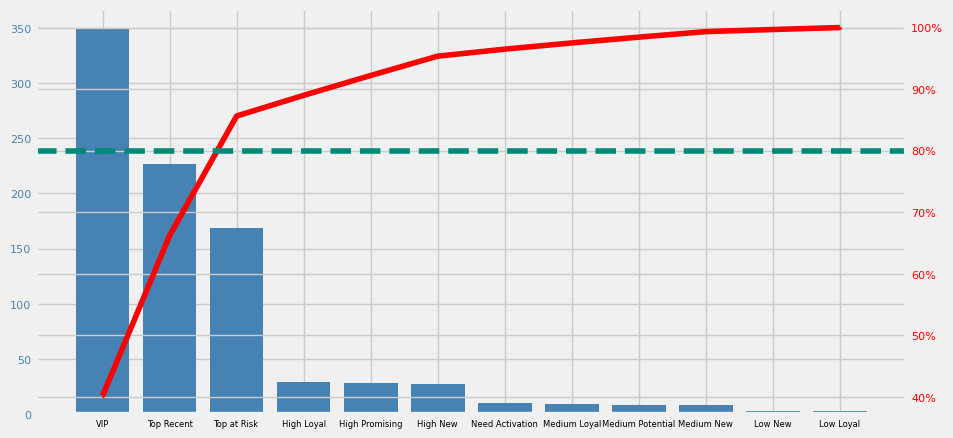

In [168]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
#line_size = 1

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(seg_pareto['Segment_labels'], seg_pareto['Monetary'], color=color1)


#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(seg_pareto['Segment_labels'], seg_pareto['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])
ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 6)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()

In [175]:
data6=data_process.sort_values('Monetary', ascending=False)
data6

,Customer ID,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score,Segment_labels
37052,50387.000000,445,1,143104.000000,2,2,4,224,8,Top Recent
30052,39685.000000,382,4,18056.240000,2,4,4,244,10,Top Recent
75207,109038.000000,42,13,17556.770280,4,4,4,444,12,VIP
77954,113963.000000,12,1,14028.992000,4,3,4,434,11,VIP
75910,110215.000000,31,9,13845.524000,4,4,4,444,12,VIP
...,...,...,...,...,...,...,...,...,...,...
735,1010.000000,767,1,0.004000,1,1,1,111,3,Need Activation
11881,15730.000000,634,1,0.004000,1,1,1,111,3,Need Activation
2134,2896.000000,727,1,0.004000,1,1,1,111,3,Need Activation
72241,104194.000000,133,1,0.004000,4,3,1,431,8,Low New


In [178]:
data6["Monetary%"] = data6["Monetary"]/data6["Monetary"].sum()
data6 = data6.sort_values(by=['Monetary%'], ascending=False)
data6["CumulativePercentage"] = (data6["Monetary"].cumsum()/ 
                                      data6["Monetary"].sum()*100).round(2)

In [179]:
data6=data6.groupby('Customer ID').agg({'Monetary':np.sum}).sort_values(by='Monetary', ascending=False)
data6=pd.DataFrame(data6)
data6

,Monetary
Customer ID,
50387.000000,143104.000000
39685.000000,18056.240000
109038.000000,17556.770280
113963.000000,14028.992000
110215.000000,13845.524000
...,...
1010.000000,0.004000
15730.000000,0.004000
2896.000000,0.004000


In [192]:
data6["CumulativePercentage"] = (data6["Monetary"].cumsum()/data6["Monetary"].sum()*100)
data6= data6.reset_index()
data6

,Customer ID,Monetary,CumulativePercentage
0,50387.000000,143104.000000,2.214484
1,39685.000000,18056.240000,2.493898
2,109038.000000,17556.770280,2.765583
3,113963.000000,14028.992000,2.982677
4,110215.000000,13845.524000,3.196931
...,...,...,...
78680,1010.000000,0.004000,100.000000
78681,15730.000000,0.004000,100.000000
78682,2896.000000,0.004000,100.000000
78683,104194.000000,0.004000,100.000000


In [193]:
paretolimit=data6[(data6["CumulativePercentage"]>=79.99) & (data6["CumulativePercentage"]<=80.1)]
paretolimit

,Customer ID,Monetary,CumulativePercentage
12455,114697.000000,98.864000,79.990734
12456,73923.000000,98.824000,79.992263
12457,72270.000000,98.808000,79.993792
12458,39476.000000,98.800000,79.995321
12459,19479.000000,98.798000,79.996850
...,...,...,...
12522,105120.000000,97.900000,80.092684
12523,82397.000000,97.860000,80.094198
12524,73071.000000,97.856000,80.095712
12525,16382.000000,97.832000,80.097226


In [194]:
# bring the 16%
round(12459/(len(data6)),2)*100

16.0